# Taller 1: Análisis de Sobrevida con Python

## 1. Introducción

El análisis de sobrevida es una técnica estadística empleada para estudiar el tiempo que transcurre hasta la ocurrencia de un evento de interés, como la muerte, la recuperación o la recaída de una enfermedad. Este tipo de análisis es fundamental en áreas como la medicina, la epidemiología y las ciencias sociales, donde no solo importa si ocurre un evento, sino cuándo ocurre.

En este taller, utilizaremos Python para realizar análisis de sobrevida en una cohorte simulada de pacientes, enfocándonos en los métodos no paramétricos (Kaplan-Meier y log-rank test) y en la regresión de Cox para evaluar variables predictoras. Este enfoque permite extraer información valiosa sobre los factores que afectan el tiempo de sobrevida en distintos grupos poblacionales.

## 2. Objetivos

Al finalizar este taller, los y las estudiantes serán capaces de:

* Fundamentos del análisis de sobrevida*
    - Entender conceptos clave como tiempo a evento, censura y función de sobrevida.
    - Representar datos de tiempo a evento en formato adecuado para análisis.

* Métodos no paramétricos
    - Calcular y graficar curvas de sobrevida utilizando el método de Kaplan-Meier.
    - Comparar la sobrevida entre dos o más grupos utilizando el test de log-rank.
    - Interpretar visualmente diferencias en la sobrevida.

* Regresión de Cox
    - Ajustar un modelo de riesgos proporcionales de Cox para evaluar predictores de sobrevida.
    - Interpretar coeficientes del modelo como razones de riesgo (hazard ratios).
    - Evaluar supuestos del modelo de Cox, como la proporcionalidad de riesgos.

* Visualización e interpretación
    - Generar gráficos de curvas de sobrevida con intervalos de confianza.
    - Interpretar y comunicar resultados en términos clínicos o de salud pública.
    - Aplicar análisis de sobrevida en el contexto de datos reales o simulados del Ministerio de Salud.


## 3. Descripción del Dataset

El **AIDS Clinical Trials Group Study 175** Dataset, publicado inicialmente en 1996, es una colección completa de estadísticas de salud e información categórica sobre pacientes diagnosticados con SIDA. Este dataset fue creado con el propósito principal de examinar el desempeño de diferentes tipos de tratamientos para el SIDA: zidovudina (AZT) versus didanosina (ddI), AZT más ddI y AZT más zalcitabina (ddC). La tarea de predicción asociada a este dataset consiste en determinar si cada paciente falleció dentro de una ventana de tiempo específica.

El dataset fue creado para evaluar la eficacia y seguridad de varios tratamientos para el SIDA, comparando específicamente el desempeño de AZT, ddI y ddC en la prevención de la progresión de la enfermedad en pacientes infectados con VIH con conteos de CD4 entre 200 y 500 células/mm³. Este ensayo de intervención tenía como objetivo aportar información sobre la efectividad de la monoterapia frente a la terapia combinada con análogos de nucleósidos.

Se encuentra representado por 24 variables y 2139 observaciones mediante una tabla. Las variables incluyen información sobre el tiempo de supervivencia, edad, peso, diagnóstico, evento clínico, entre otras.

El dataset se encuentra disponible en la plataforma Kaggle, y puede ser descargado manualmente desde el siguiente enlace: [AIDS Clinical Trials Dataset](https://www.kaggle.com/datasets/tanshihjen/aids-clinical-trials). 

<div style="text-align:center;">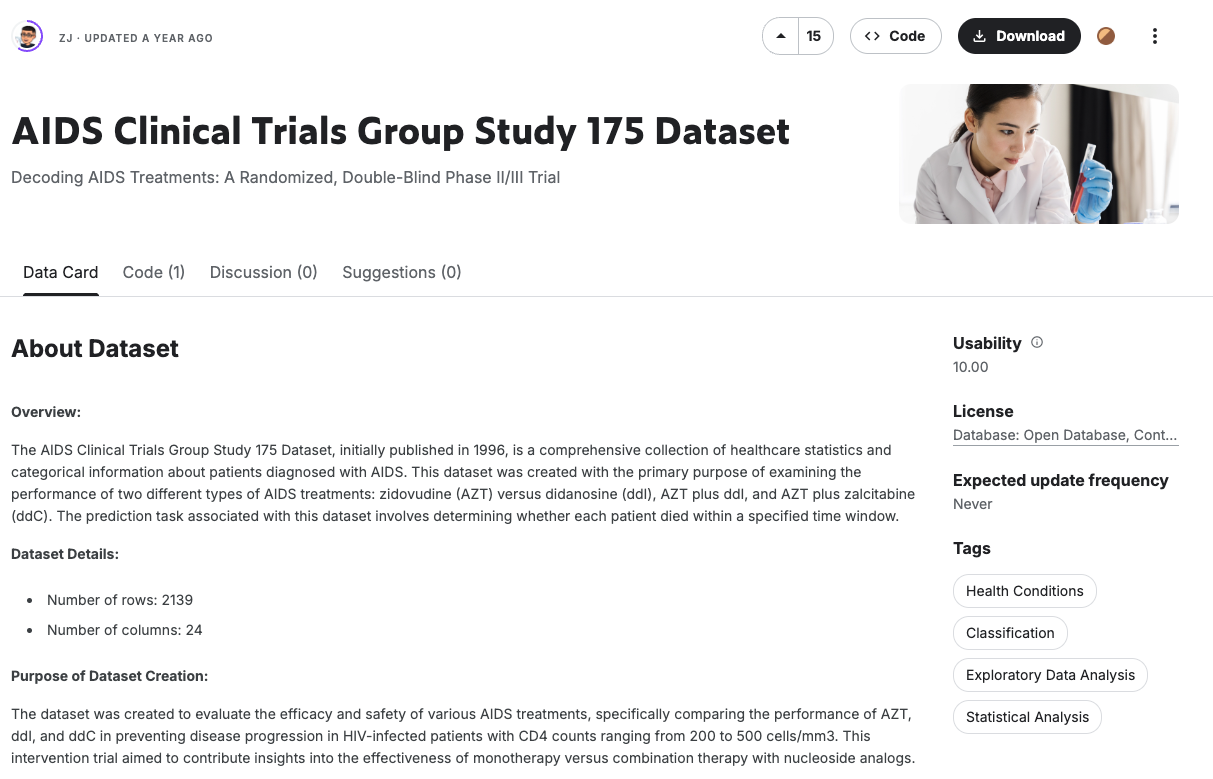</div>

Descarga de datos mediante Kaggle API:

In [16]:
# importar librerias necesarias
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt


# Descargar el dataset "aids-clinical-trials" de Kaggle
folder = kagglehub.dataset_download("tanshihjen/aids-clinical-trials")
print("Ruta a la carpeta:", folder)

# Ruta al archivo descargado
path = os.path.join(folder, "AIDS_ClinicalTrial_GroupStudy175.csv")
print("Ruta al archivo:", path)

# Cargar el dataset en un DataFrame de pandas
df = pd.read_csv(path)
print(df)

Ruta a la carpeta: /Users/carlos/.cache/kagglehub/datasets/tanshihjen/aids-clinical-trials/versions/1
Ruta al archivo: /Users/carlos/.cache/kagglehub/datasets/tanshihjen/aids-clinical-trials/versions/1/AIDS_ClinicalTrial_GroupStudy175.csv
      time  trt  age      wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  \
0      948    2   48   89.8128     0     0      0     100       0    0  ...   
1     1002    3   61   49.4424     0     0      0      90       0    1  ...   
2      961    3   45   88.4520     0     1      1      90       0    1  ...   
3     1166    3   47   85.2768     0     1      0     100       0    1  ...   
4     1090    0   43   66.6792     0     1      0     100       0    1  ...   
...    ...  ...  ...       ...   ...   ...    ...     ...     ...  ...  ...   
2134  1091    3   21   53.2980     1     0      0     100       0    1  ...   
2135   395    0   17  102.9672     1     0      0     100       0    1  ...   
2136  1104    2   53   69.8544     1     1      0 

#### **Ejercicio 1** 

Describa las principales características del conjunto de datos: número de observaciones, porcentaje de censura, distribución del tiempo hasta el evento.

In [11]:
# <CODE>

# Número de filas y columnas
print("Tamaño del dataset:", df.shape)

# Porcentaje de censura
censura_pct = 100 * (df['label'] == 0).mean()
print(f"Porcentaje de censura: {censura_pct:.2f}%")

# Estadísticas descriptivas del tiempo
print(df['time'].describe())

Tamaño del dataset: (2139, 24)
Porcentaje de censura: 75.64%
count    2139.000000
mean      879.098177
std       292.274324
min        14.000000
25%       727.000000
50%       997.000000
75%      1091.000000
max      1231.000000
Name: time, dtype: float64


#### **Ejercicio 2** 

Estime la curva de sobrevida utilizando el método de Kaplan-Meier para el conjunto completo de datos. Genere un gráfico con el estimador. HINT: Utilice el paquete `lifelines` para realizar el ajuste y graficar la curva de sobrevida.


In [49]:
# <CODE> 
!pip install lifelines

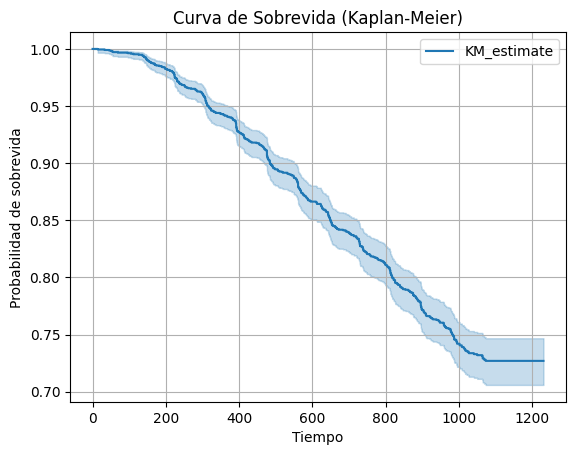

In [ ]:
# <CODE>
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

kmf.fit(durations=df['time'], event_observed=df['label'])

# Graficar la curva de Kaplan-Meier
kmf.plot_survival_function()
plt.title("Curva de Sobrevida (Kaplan-Meier)")
plt.xlabel("Tiempo")
plt.ylabel("Probabilidad de sobrevida")
plt.grid(True)
plt.show()

#### **Ejercicio 3** 
Compare la sobrevida entre los grupos `ZDV only`y `ddI only` utilizando el test de log-rank. Genere un gráfico con las curvas de sobrevida y el valor p del test. Responda:
- ¿Existen diferencias significativas en la sobrevida entre estos dos grupos?
- ¿Cómo se interpretan las curvas de sobrevida en este contexto?

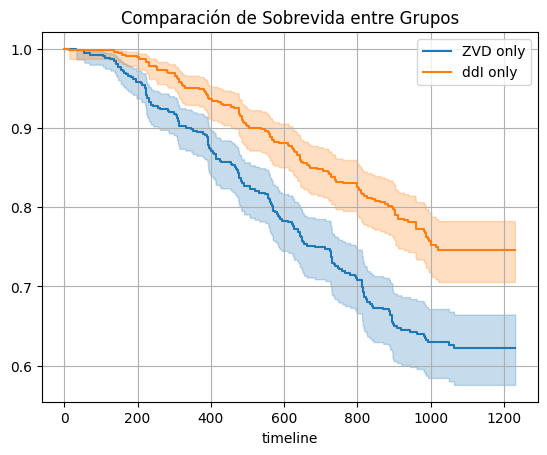

Valor p del test de log-rank: 3.7496312519863263e-06
Diferencias significativas: True


In [ ]:
# <CODE>
from lifelines.statistics import logrank_test

# Separar por grupo
grupo_a = df[df['trt'] == 0]
grupo_b = df[df['trt'] == 3]

# Ajustar modelo para cada grupo
kmf_a = KaplanMeierFitter()
kmf_b = KaplanMeierFitter()

kmf_a.fit(grupo_a['time'], grupo_a['label'], label='ZVD only')
kmf_b.fit(grupo_b['time'], grupo_b['label'], label='ddI only')

# Graficar ambas curvas
ax = kmf_a.plot_survival_function()
kmf_b.plot_survival_function(ax=ax)
plt.title("Comparación de Sobrevida entre Grupos")
plt.grid(True)
plt.show()

# Test de log-rank
resultado = logrank_test(grupo_a['time'], grupo_b['time'],
                         event_observed_A=grupo_a['label'],
                         event_observed_B=grupo_b['label'])

print("Valor p del test de log-rank:", resultado.p_value)
print("Diferencias significativas:", resultado.p_value < 0.05)

#### **Ejercicio 4** 
Ajuste un modelo de regresión de Cox para evaluar el efecto de las variables `age`, `wtkg`, `trt`, `str2`, `gender` y `race` sobre la sobrevida. Interprete los coeficientes del modelo como razones de riesgo (hazard ratios). Responda:
* ¿Qué variables son estadísticamente significativas en el modelo?


In [ ]:
# <CODE>
from lifelines import CoxPHFitter

# Crear un nuevo dataframe solo con las variables relevantes
variables_modelo = ['time', 'label', 'age','wtkg' ,'trt', 'str2', 'gender', 'race']
df_modelo = df[variables_modelo].copy()

# Ajustar el modelo de Cox
cph = CoxPHFitter()
cph.fit(df_modelo, duration_col='time', event_col='label')

# Mostrar resumen
cph.print_summary()



<lifelines.CoxPHFitter: fitted with 2139 total observations, 1618 right-censored observations>
             duration col = 'time'
                event col = 'label'
      baseline estimation = breslow
   number of observations = 2139
number of events observed = 521
   partial log-likelihood = -3838.26
         time fit was run = 2025-07-30 03:33:28 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age        0.01      1.01      0.01            0.00            0.02                1.00                1.02
wtkg       0.00      1.00      0.00           -0.01            0.01                0.99                1.01
trt       -0.18      0.84      0.04           -0.25           -0.10                0.78                0.91
str2       0.46      1.59      0.10            0.27            0.65                1.32                1.91
gender     0.20      1.22      0.13           -0.06            0.46                0.94                1.59
race      -0.08      0.92      0.11           -0.29            0.13                0.75                1.14

           cmp to     z      p  -log2(p)
covariate                               
age          0.00  2.09   0.04      4.77
wtkg         0.00  0.22   0.82      0.28
trt          0.00 -4.41 <0.005     16.55
str2         0.00  4.82 <0.005     19.44
gender       0.00  1.49   0.14      2.87
race         0.00 -0.75   0.45      1.14
---
Concordance = 0.60
Partial AIC = 7688.52
log-likelihood ratio test = 54.89 on 6 df
-log2(p) of ll-ratio test = 30.93

#### **Ejercicio 5** 
Interprete los coeficientes del modelo de Cox. Identifique qué variables están significativamente asociadas con el tiempo de sobrevida y si aumentan o disminuyen el riesgo.

In [47]:
# <CODE>
# Interpretar los coeficientes del modelo
print("\nInterpretación de los coeficientes:")
for variable in variables_modelo[2:]:  # Excluir 'time' y 'label'
    coef = cph.params_[variable]
    hazard_ratio = cph.hazard_ratios_[variable]
    print(f"{variable}: Coeficiente = {coef:.4f}, Razón de Riesgo (Hazard Ratio) = {hazard_ratio:.4f}")




Interpretación de los coeficientes:
age: Coeficiente = 0.0105, Razón de Riesgo (Hazard Ratio) = 1.0105
wtkg: Coeficiente = 0.0008, Razón de Riesgo (Hazard Ratio) = 1.0008
trt: Coeficiente = -0.1762, Razón de Riesgo (Hazard Ratio) = 0.8384
str2: Coeficiente = 0.4618, Razón de Riesgo (Hazard Ratio) = 1.5869
gender: Coeficiente = 0.2000, Razón de Riesgo (Hazard Ratio) = 1.2214
race: Coeficiente = -0.0801, Razón de Riesgo (Hazard Ratio) = 0.9230


#### **Ejercicio 6** 
Evalúe gráficamente el supuesto de riesgos proporcionales del modelo de Cox. Interprete los resultados. ¿Se cumple el supuesto de proporcionalidad de riesgos?


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 2139 total observations, 1618 right-censored observations>
         test_name = proportional_hazard_test

---
             test_statistic    p  -log2(p)
age    km              1.19 0.27      1.86
       rank            1.31 0.25      1.98
gender km              0.00 0.97      0.05
       rank            0.00 0.95      0.07
race   km              0.03 0.86      0.22
       rank            0.04 0.84      0.25
str2   km              0.09 0.77      0.38
       rank            0.11 0.74      0.44
trt    km              5.59 0.02      5.79
       rank            5.50 0.02      5.72
wtkg   km              0.33 0.57      0.82
       rank            0.34 0.56      0.84



1. Variable 'trt' failed the non-proportional test: p-value is 0.0180.

   Advice: with so few unique values (only 4), you can include `strata=['trt', ...]` in the call in
`.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
[E]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumpt

[[<Axes: xlabel='rank-transformed time\n(p=0.2527)'>,
  <Axes: xlabel='km-transformed time\n(p=0.2747)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.5604)'>,
  <Axes: xlabel='km-transformed time\n(p=0.5658)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0190)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0180)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.7383)'>,
  <Axes: xlabel='km-transformed time\n(p=0.7705)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9543)'>,
  <Axes: xlabel='km-transformed time\n(p=0.9651)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.8423)'>,
  <Axes: xlabel='km-transformed time\n(p=0.8606)'>]]

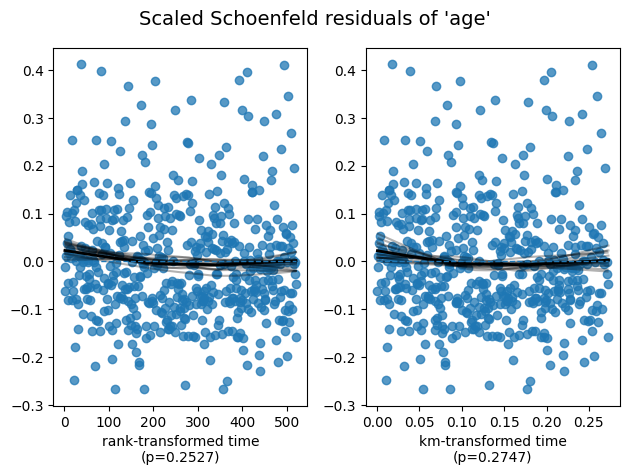

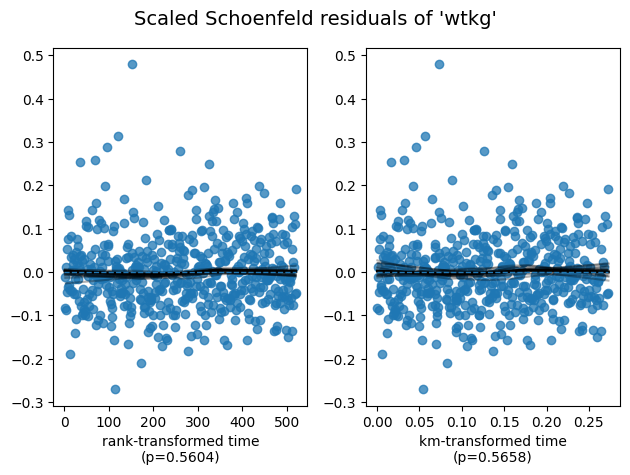

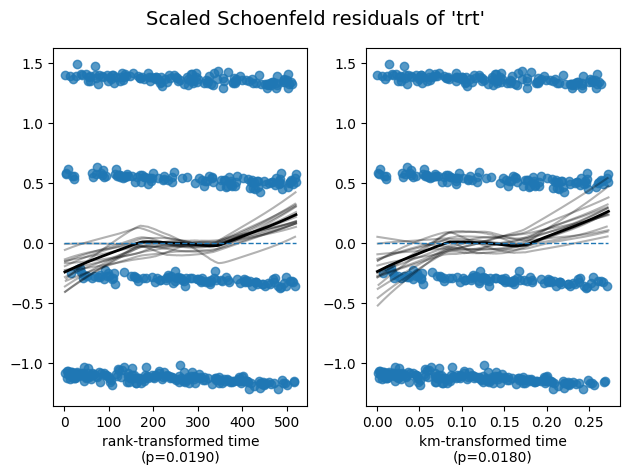

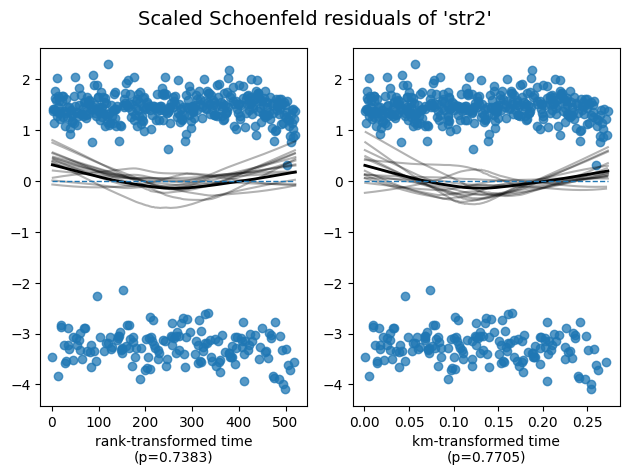

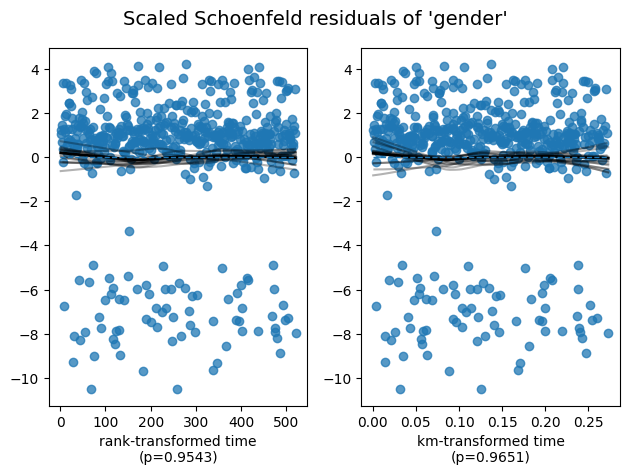

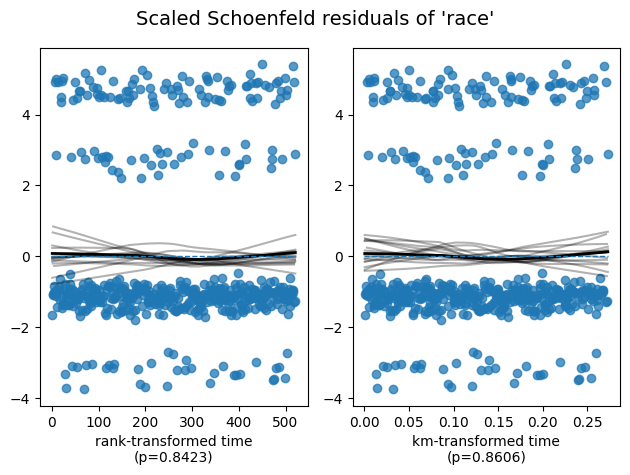

In [48]:
# <CODE>
# Verificar supuestos de proporcionalidad de riesgos
cph.check_assumptions(df_modelo, p_value_threshold=0.05, show_plots=True)